<a href="https://colab.research.google.com/github/BrenesRi/HCIDataAnalysis/blob/master/EstadisticaHCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reporte de Proyectos**

In [ ]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

#LINEA QUE SE EDITA CON EL NOMBRE DEL ARCHIVO .CSV ACTUALIZADO
dfinicial = pd.read_csv('HCIDatos2.csv')


#display(dfinicial[['Ubicacion', 'DuracionF323', 'DuracionF314']])
df = dfinicial[dfinicial['Vis'] == 1].copy()
#df.head()

Saving HCIDatos2.csv to HCIDatos2 (2).csv


# **Análisis de Anteproyectos**

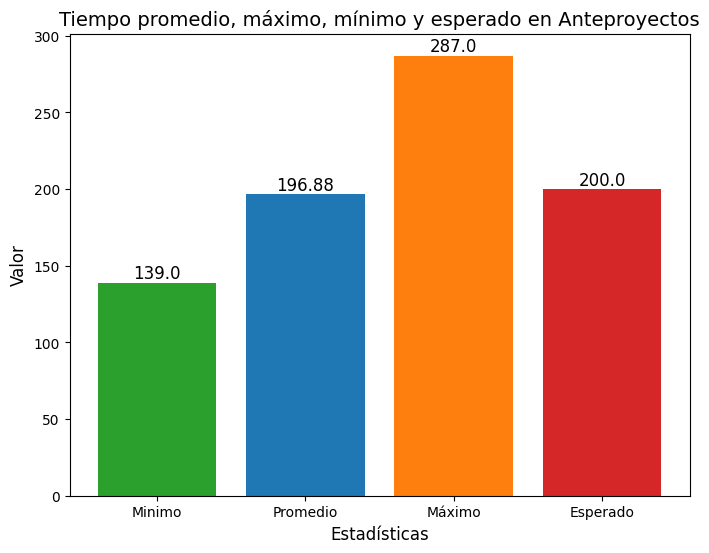

In [ ]:
# @title
# Using .loc to avoid SettingWithCopyWarning
df.loc[:, 'Duracion_max'] = df[['DuracionF314', 'DuracionF323']].max(axis=1)
# Filter to create anteproyecto_df (after creating 'Duracion_max')
anteproyecto_df = df[((df['EstF314'] == 'si') | (df['EstF323'] == 'si'))]
#display(anteproyecto_df[['Ubicacion','Duracion_max', 'DuracionF323', 'DuracionF314']])
promedio_duracion_max = anteproyecto_df['Duracion_max'].mean()
minimo = anteproyecto_df['Duracion_max'].min()
maximo = anteproyecto_df['Duracion_max'].max()
esperado = 200

# Valores para la gráfica
#estadisticas = ['Promedio', 'Máximo', 'Mínimo', 'Esperado']
estadisticas = ['Minimo', 'Promedio', 'Máximo', 'Esperado']
valores = [minimo, promedio_duracion_max, maximo, esperado]  # Usamos promedio_duracion_max en lugar de promedio2
colores = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 6))
bars = plt.bar(estadisticas, valores, color=colores)
plt.title('Tiempo promedio, máximo, mínimo y esperado en Anteproyectos', fontsize=14)
plt.xlabel('Estadísticas', fontsize=12)
plt.ylabel('Valor', fontsize=12)

# Añadir los valores numéricos en cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (el valor)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=12)

# Mostrar la gráfica
plt.show()


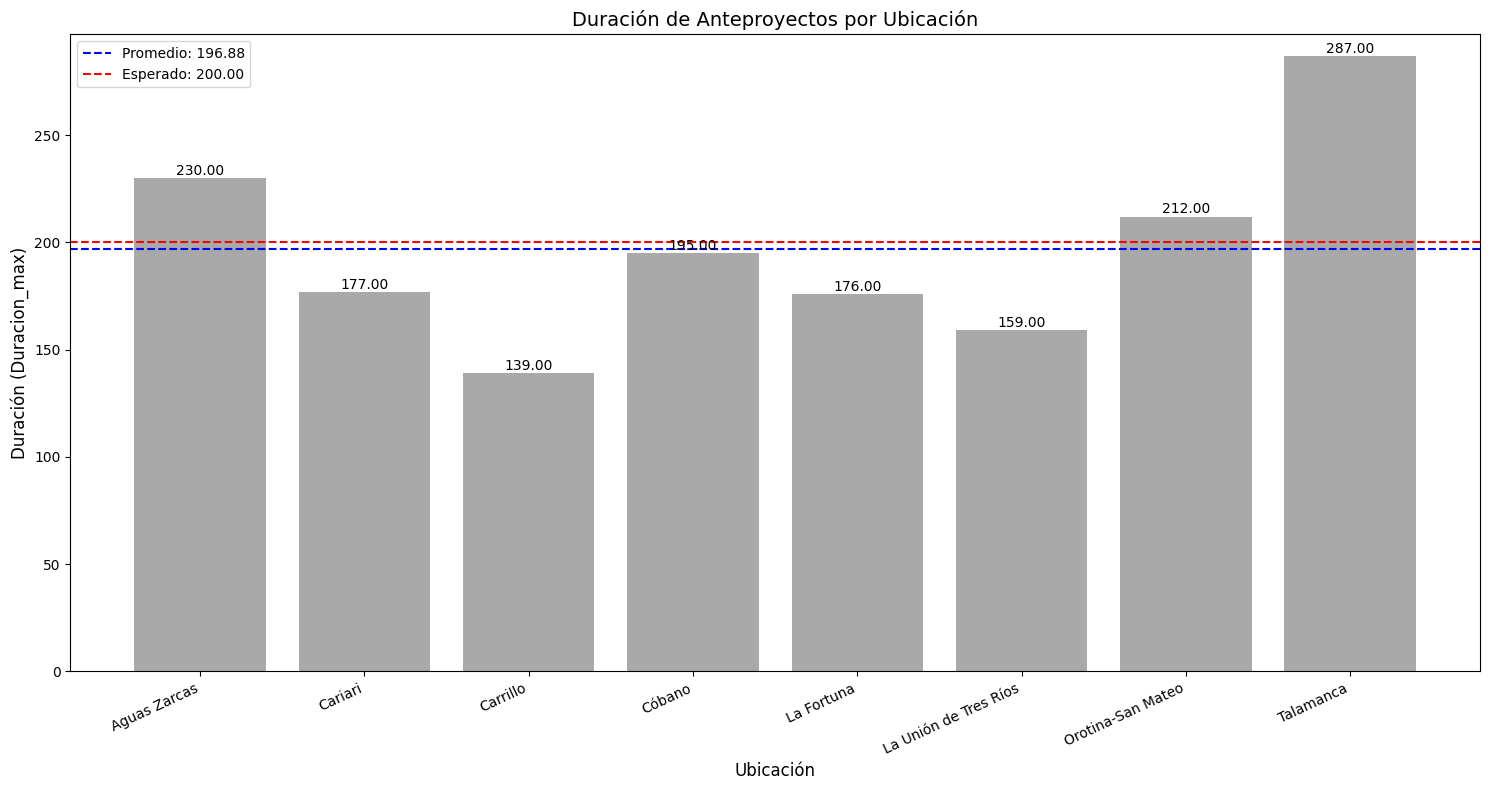

In [ ]:
# @title
# Calcular el valor máximo entre 'DuracionF314' and 'DuracionF323' for each row in the original df
df.loc[:, 'Duracion_max'] = df[['DuracionF314', 'DuracionF323']].max(axis=1)

# Filter the df to create anteproyecto_df (after creating 'Duracion_max')
anteproyecto_df = df[((df['EstF314'] == 'si') | (df['EstF323'] == 'si'))]

# Now you can access 'Duracion_max' from anteproyecto_df
# ... (rest of your plotting code)
# Definir el tamaño de la figura
plt.figure(figsize=(15, 8))

# Crear el gráfico de barras utilizando la nueva columna 'Duracion_max'
bars = plt.bar(anteproyecto_df['Ubicacion'], anteproyecto_df['Duracion_max'], color='darkgray')

# Añadir el valor de la duración encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Título y etiquetas
plt.title('Duración de Anteproyectos por Ubicación', fontsize=14)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Duración (Duracion_max)', fontsize=12)

# Asegúrate de que las líneas horizontales estén dentro del rango adecuado
plt.ylim(0, max(anteproyecto_df['Duracion_max']) + 10)  # Ajustar el límite superior del eje Y

# Agregar líneas horizontales para el promedio y el esperado
plt.axhline(promedio_duracion_max , color='blue', linestyle='--', label=f'Promedio: {promedio_duracion_max :.2f}')
plt.axhline(esperado, color='red', linestyle='--', label=f'Esperado: {esperado:.2f}')

# Añadir leyenda
plt.legend()

# Rotar las etiquetas en el eje X para mayor legibilidad
plt.xticks(rotation=25, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# **Análisis de Diseños**

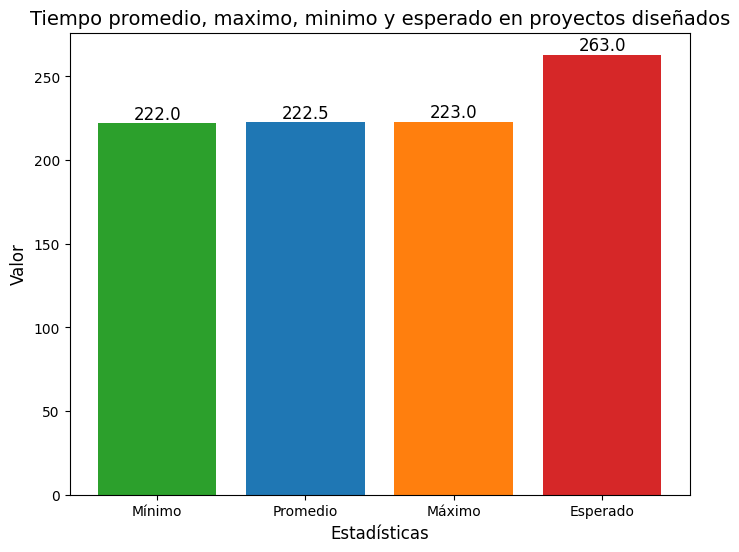

In [ ]:
# @title
from IPython.display import display

filtered_df = df[(df['EstF324'] == 'si') & (df['Vis'] == 1)]

# Calcular las estadísticas de la columna 'F323' en el DataFrame filtrado
promedio = filtered_df['DuracionF324'].mean()
maximo = filtered_df['DuracionF324'].max()
minimo = filtered_df['DuracionF324'].min()
esperado = 263

# Valores para la gráfica
estadisticas = ['Mínimo', 'Promedio', 'Máximo', 'Esperado']
valores = [minimo, promedio, maximo, esperado]
colores = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(estadisticas, valores, color=colores)
plt.title('Tiempo promedio, maximo, minimo y esperado en proyectos diseñados', fontsize=14)
plt.xlabel('Estadísticas', fontsize=12)
plt.ylabel('Valor', fontsize=12)

for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (el valor)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=12)

# Mostrar la gráfica
plt.show()


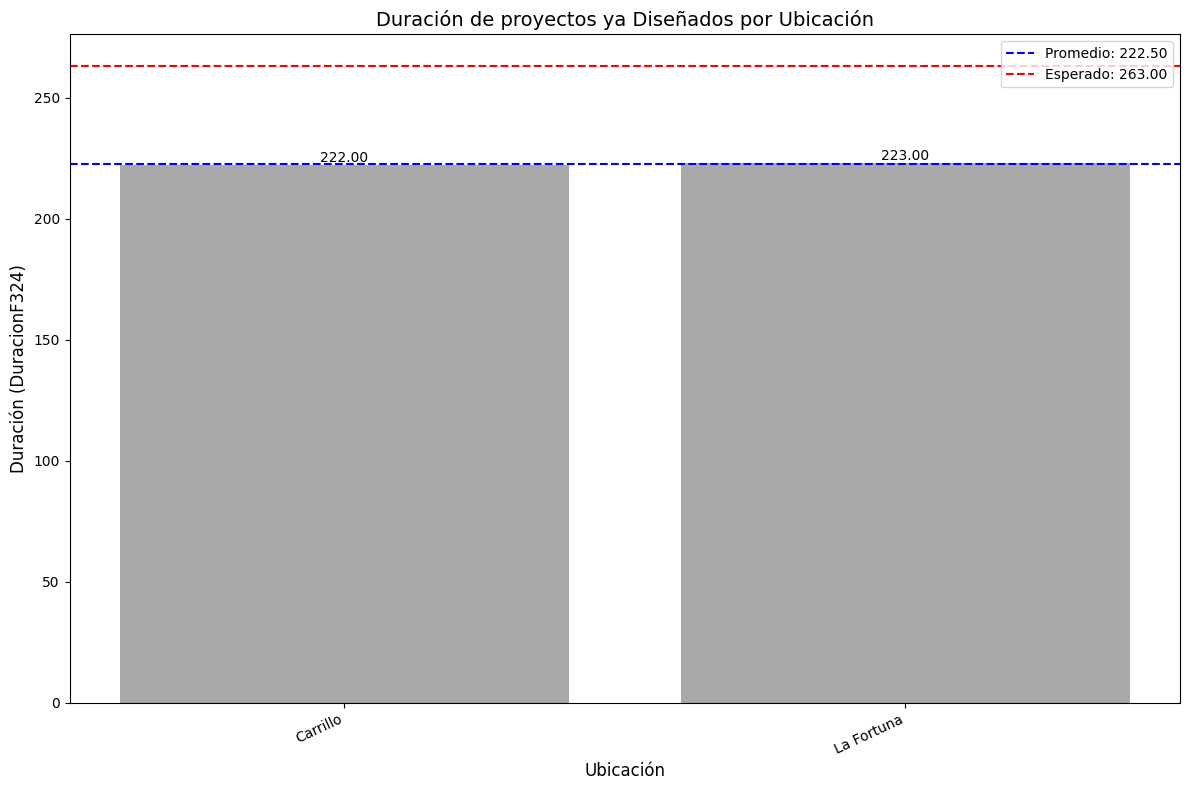

In [ ]:
# @title
# Definimos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos el gráfico de barras verticales
bars = plt.bar(filtered_df['Ubicacion'], filtered_df['DuracionF324'], color='darkgray')

# Añadir el valor de la duración encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Título y etiquetas
plt.title('Duración de proyectos ya Diseñados por Ubicación', fontsize=14)
plt.xlabel('Ubicación', fontsize=12)
plt.ylabel('Duración (DuracionF324)', fontsize=12)

# Agregar líneas horizontales para el promedio y el esperado
plt.axhline(promedio, color='blue', linestyle='--', label=f'Promedio: {promedio:.2f}')
plt.axhline(esperado, color='red', linestyle='--', label=f'Esperado: {esperado:.2f}')

# Añadir leyenda
plt.legend()

plt.xticks(rotation=25, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()
